# Preprocessing with Bounding Boxes

In [1]:
import pandas as pd
import pathlib
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

#import utilities
import sys
sys.path.append('src/')
import utils as utils
from preprocessing3 import *


#import tensorflow as t
#from tensorflow import keras

#from comet_ml import Experiment

In [ ]:
# import random

In [ ]:
'''
import albumentations as A
from albumentations.pytorch import ToTensor

import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms.functional as TF
from torch import nn
import torch.nn.functional as F
from torch.utils.data import SubsetRandomSampler
from torch.utils.data.sampler import SequentialSampler, RandomSampler
from torch.optim import Adam,lr_scheduler

from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

from tqdm import tqdm_notebook, tqdm
'''

In [2]:
# define training and save paths and read in training csv and label key
data_dir = pathlib.Path('gwhd_2021/images/')
images = list(data_dir.glob('*.jpg'))

In [3]:
# images

In [4]:
# Import data
metadata = pd.read_csv('gwhd_2021/metadata_dataset.csv', sep=';')
train = pd.read_csv('gwhd_2021/competition_train.csv')
# Update metadata['name'] to metadata['domain'] to match full column name
metadata.rename(columns = {"name": "domain"}, inplace=True)

In [5]:
# Merge dfs and preprocess
train_df = train.merge(metadata, on='domain')

In [6]:
test = pd.read_csv('gwhd_2021/competition_test.csv')

In [7]:
test_df = test.merge(metadata, on='domain')

In [8]:
train_df = utils.preprocess_df(train_df)

In [9]:
train_df.head()

,image_name,BoxesString,domain,country,location,development_stage,bbox_xmin,bbox_ymin,bbox_xmax,bbox_ymax,bbox_width,bbox_height
0,4563856cc6d75c670eafd86d5eb7245fbe8f273c28f9e3...,"[99, 692, 160, 764]",Arvalis_1,France,Gréoux,Post-flowering,99.0,692.0,160.0,764.0,61.0,72.0
1,4563856cc6d75c670eafd86d5eb7245fbe8f273c28f9e3...,"[641, 27, 697, 115]",Arvalis_1,France,Gréoux,Post-flowering,641.0,27.0,697.0,115.0,56.0,88.0
2,4563856cc6d75c670eafd86d5eb7245fbe8f273c28f9e3...,"[935, 978, 1012, 1020]",Arvalis_1,France,Gréoux,Post-flowering,935.0,978.0,1012.0,1020.0,77.0,42.0
3,4563856cc6d75c670eafd86d5eb7245fbe8f273c28f9e3...,"[377, 834, 463, 890]",Arvalis_1,France,Gréoux,Post-flowering,377.0,834.0,463.0,890.0,86.0,56.0
4,4563856cc6d75c670eafd86d5eb7245fbe8f273c28f9e3...,"[654, 797, 696, 837]",Arvalis_1,France,Gréoux,Post-flowering,654.0,797.0,696.0,837.0,42.0,40.0


In [10]:
test_df = utils.preprocess_df(test_df)

In [11]:
test_df.head()

,image_name,BoxesString,domain,country,location,development_stage,bbox_xmin,bbox_ymin,bbox_xmax,bbox_ymax,bbox_width,bbox_height
0,255b6ca9fea63f44125e5174bc932470b604c760430715...,"[481, 820, 604, 922]",UQ_7,Australia,Gatton,Ripening,481.0,820.0,604.0,922.0,123.0,102.0
1,255b6ca9fea63f44125e5174bc932470b604c760430715...,"[655, 957, 732, 1024]",UQ_7,Australia,Gatton,Ripening,655.0,957.0,732.0,1024.0,77.0,67.0
2,255b6ca9fea63f44125e5174bc932470b604c760430715...,"[930, 926, 1013, 1024]",UQ_7,Australia,Gatton,Ripening,930.0,926.0,1013.0,1024.0,83.0,98.0
3,255b6ca9fea63f44125e5174bc932470b604c760430715...,"[809, 851, 910, 924]",UQ_7,Australia,Gatton,Ripening,809.0,851.0,910.0,924.0,101.0,73.0
4,255b6ca9fea63f44125e5174bc932470b604c760430715...,"[836, 904, 866, 967]",UQ_7,Australia,Gatton,Ripening,836.0,904.0,866.0,967.0,30.0,63.0


First off, let's address the class imbalances of development stage. 

## Balancing class distribution

In [12]:
#utils.set_plot(16)
#train_df.groupby('development_stage').count().plot.barh(title='Training Images - Class Counts', 
                                                        #legend=False, color='royalblue', 
                                                        #xlabel="Development stage")
#plt.show()

In [ ]:
## To use the balanced_df function, we will need a numeric label representation
#label_dict = {'Ripening': 0, 'Post-flowering': 1, 'Filling - Ripening': 2, 'Filling': 3}

#train_df['label'] = train_df['development_stage'].copy()
#train_df['label'].replace(label_dict, inplace=True)

In [ ]:
#balanced_df = utils.balance_df(train_df, class_size=10000)

In [ ]:
#balanced_df.groupby('development_stage').count().plot.barh(title='Training Images - Class Counts', 
                                                        #legend=False, color='royalblue', 
                                                        #xlabel="Development stage")
#plt.show()

# Test-Time Augmentation with Mosaic Generator
~~Although the augmentations completed in the previous notebook looked great, the process of creating those augmented images (with the albumentations library) is just too computationally expensive to be a viable option for an image dataset of this size. As a more cost-efficient alternative, we will instead use Time-Test Augmentation (TTA) to employ simple, real-time augmentions at the time of modeling using the `ImageDataGenerator` class from Keras. ~~

In [ ]:
'''
# make a prediction using test-time augmentation
def tta_prediction(datagen, model, image, n_examples):
    # convert image into dataset
    samples = expand_dims(image, 0)
    # prepare iterator
    it = datagen.flow(samples, batch_size=n_examples)
    # make predictions for each augmented image
    yhats = model.predict_generator(it, steps=n_examples, verbose=0)
    # sum across predictions
    summed = numpy.sum(yhats, axis=0)
    # argmax across classes
    return argmax(summed)
'''

In [13]:
train_image_ids = train_df.image_name.unique()
test_image_ids = test_df.image_name.unique()

In [ ]:
#def collate_fn(batch):
    #return tuple(zip(*batch))

In [14]:
train_dataset = WheatDataset(
    image_ids=train_image_ids,
    labels_df= train_df,
    transforms=get_train_transforms(),
    test=False
)

validation_dataset = WheatDataset(
    image_ids=test_image_ids,
    labels_df=test_df,
    transforms=get_valid_transforms(),
    test=True
)

In [16]:
# Create dataloader
train_loader = DataLoader(train_dataset,
                         batch_size = TrainGlobalConfig.batch_size,
                         collate_fn = collate_fn,
                         shuffle=True)

validation_loader = DataLoader(validation_dataset,
                         batch_size = TrainGlobalConfig.batch_size,
                         collate_fn = collate_fn)

In [ ]:
# Syntax:
# cv2.rectangle(image, start_point, end_point, color, thickness)

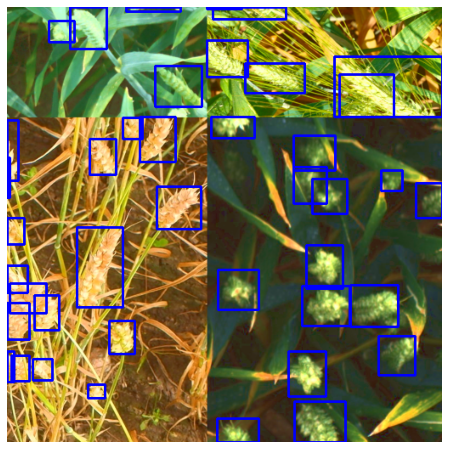

In [17]:
image, target, image_id = train_dataset[1]
boxes = target['boxes'].cpu().numpy().astype(np.int32)

numpy_image = image.permute(1,2,0).cpu().numpy()

fig, ax = plt.subplots(1, 1, figsize=(16, 8))

for box in boxes:
    #cv2.rectangle(numpy_image, (box[0], box[1]), (box[2],  box[3]), (0, 1, 0), 1)
    cv2.rectangle(numpy_image, (box[1], box[0]), (box[3],  box[2]), (0, 0, 1), 2)
    
ax.set_axis_off()
ax.imshow(numpy_image)

*Note: To see further implementations of both Albumentations augmentations, as well as CutMix TTA augmentations, please see their respective notebooks contained in this repo.*
* `Data_Augmentation_Albumentations.ipynb`
* `Data_Augmentation_CutMix.ipynb`

## Fitting the model

In [18]:
from effdet.config.model_config import efficientdet_model_param_dict
from effdet import get_efficientdet_config, EfficientDet, DetBenchTrain
from effdet.efficientdet import HeadNet
import timm

In [19]:
print('timm currently has {} models available,'.format(len(timm.list_models('*'))))

timm currently has 739 models available,


In [20]:
print(f'timm currently has: {len(timm.list_models(pretrained=True))} pre-trained models available.')

timm currently has: 592 pre-trained models available.


In [21]:
print(f'number of configs for efficientdet: {len(efficientdet_model_param_dict)}')

list(efficientdet_model_param_dict.keys())[::3]

number of configs for efficientdet: 47


['efficientdet_d0',
 'efficientdet_d3',
 'efficientdetv2_dt',
 'cspresdet50',
 'cspdarkdet53',
 'mixdet_l',
 'mobiledetv3_large',
 'efficientdet_q2',
 'efficientdet_em',
 'tf_efficientdet_d1',
 'tf_efficientdet_d4',
 'tf_efficientdet_d7',
 'tf_efficientdet_d1_ap',
 'tf_efficientdet_d4_ap',
 'tf_efficientdet_lite1',
 'tf_efficientdet_lite3x']

$\Rightarrow$ $\Rightarrow$ See link to TensorFlow's [effdet d5 here](https://tfhub.dev/tensorflow/efficientdet/d5/1) $\Leftarrow$ $\Leftarrow$

In [22]:
timm.list_models('tf_efficientnetv2_*')

['tf_efficientnetv2_b0',
 'tf_efficientnetv2_b1',
 'tf_efficientnetv2_b2',
 'tf_efficientnetv2_b3',
 'tf_efficientnetv2_l',
 'tf_efficientnetv2_l_in21ft1k',
 'tf_efficientnetv2_l_in21k',
 'tf_efficientnetv2_m',
 'tf_efficientnetv2_m_in21ft1k',
 'tf_efficientnetv2_m_in21k',
 'tf_efficientnetv2_s',
 'tf_efficientnetv2_s_in21ft1k',
 'tf_efficientnetv2_s_in21k',
 'tf_efficientnetv2_xl_in21ft1k',
 'tf_efficientnetv2_xl_in21k']

#### For full list of models available from `timm`: `timm.list_models()`


## Creating the model

In [53]:
#def get_net():
    #config = get_efficientdet_config('tf_efficientdet_d5')
    #net = EfficientDet(config, pretrained_backbone=False)
    #checkpoint = torch.load('tf_efficientdet_d5_51-c79f9be6.pth')
    #net.load_state_dict(checkpoint)
    #config.num_classes = 1
    #config.image_size = 512
    #net.class_net = HeadNet(config, num_outputs=config.num_classes, norm_kwargs=dict(eps=.001, momentum=.01))
    #return DetBenchTrain(net, config)

#net = get_net()

In [54]:
#from effdet import create_model_from_config, get_efficientdet_config

#base_config = get_efficientdet_config('tf_efficientdet_d5')
#base_config.image_size = (512, 512)
#net = create_model_from_config(base_config, bench_task='predict', num_classes=1,
                                  #checkpoint_path='tf_efficientdet_d5_51-c79f9be6.pth')

In [52]:
config = get_efficientdet_config('tf_efficientdet_d5')

config.image_size = [512,512]
config.norm_kwargs=dict(eps=.001, momentum=.01)

net = EfficientDet(config, pretrained_backbone=False)
checkpoint = torch.load('tf_efficientdet_d5_51-c79f9be6.pth')
net.load_state_dict(checkpoint)


net.reset_head(num_classes=1)
net.class_net = HeadNet(config, num_outputs=config.num_classes)

DetBenchTrain(net, config)

DetBenchTrain(
  (model): EfficientDet(
    (backbone): EfficientNetFeatures(
      (conv_stem): Conv2dSame(3, 48, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (bn1): BatchNorm2d(48, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (act1): SiLU(inplace=True)
      (blocks): Sequential(
        (0): Sequential(
          (0): DepthwiseSeparableConv(
            (conv_dw): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
            (bn1): BatchNorm2d(48, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (act1): SiLU(inplace=True)
            (se): SqueezeExcite(
              (conv_reduce): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
              (act1): SiLU(inplace=True)
              (conv_expand): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
              (gate): Sigmoid()
            )
            (conv_pw): Conv2d(48, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
       

In [55]:
#config = get_efficientdet_config('tf_efficientdet_d5')
#config.image_size = [512,512]
#config.norm_kwargs=dict(eps=.001, momentum=.01)

#net = create_model_from_config(
    #config, bench_task='predict',
    #checkpoint = '../input/effdetweights2/best-checkpoint-009epoch(1).bin',
    #checkpoint_ema=True, # if you are loading a training checkpoint and want the ema version to be used
    #num_clases=14,
#)

In [ ]:
'''
def create_model(num_classes=1, image_size=512, architecture="tf_efficientnetv2_l"):
    efficientdet_model_param_dict['tf_efficientnetv2_l'] = dict(
        name='tf_efficientnetv2_l',
        backbone_name='tf_efficientnetv2_l',
        backbone_args=dict(drop_path_rate=0.2),
        num_classes=num_classes,
        url='', )
    
    config = get_efficientdet_config(architecture)
    config.update({'num_classes': num_classes})
    config.update({'image_size': (image_size, image_size)})
    
    print(config)

    net = EfficientDet(config, pretrained_backbone=True)
    net.class_net = HeadNet(
        config,
        num_outputs=config.num_classes,
    )
    return DetBenchTrain(net, config)
'''

**NOTE: Due to the architecture of EfficientDet, the input image size must be divisible by 128!** (We will continue to use 512 x 512 pixels, as we have been doing thus far).

In [ ]:
'''
def get_net():
    config = get_efficientdet_config('tf_efficientnetv2_l')
    net = EfficientDet(config, pretrained_backbone=False)
    checkpoint = torch.load('tf_efficientnetv2_l') #d3-d7 ('efficientdet_model' folder) 
    net.load_state_dict(checkpoint)
    config.num_classes = 1
    config.image_size = 512
    net.class_net = HeadNet(config, num_outputs=config.num_classes, norm_kwargs=dict(eps=.001, momentum=.01))
    return DetBenchTrain(net, config)

net = get_net()
'''

In [ ]:
#device = torch.device('cuda:0')
#net.to(device)

In [ ]:
#from pytorch_lightning import LightningDataModule
#from torch.utils.data import DataLoader

In [ ]:
#from effdet import get_efficientdet_config, EfficientDet, DetBenchTrain, DetBenchEval
#from effdet.efficientdet import HeadNet

In [ ]:
#from effdet import DetBenchEval